<a href="https://colab.research.google.com/github/farshid101/100-days-of-machine-learning/blob/main/sentiment_analysis_using_RNN_final_Clean%20Pro%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re

In [ ]:
#!wget "https://github.com/farshid101/Thesis-2024/blob/main/Final_clean%20pro%202.xlsx"

In [2]:
df = pd.read_excel('/content/Final_clean pro 2.xlsx')

In [3]:
df

,Comments,Label
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive
3,2022 এর 25 এ জুন 🥰🥰,neutral
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive
...,...,...
6370,সব পিকাব বন্দ করে দেয়া হোক,negative
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,neutral
6372,এগুলা সব বিনপির এর কাজ,neutral
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক,negative


In [ ]:
#train = df.drop(['Comment to English','Emoji to text' ,'prediction','max_sentiment_label','max_sentiment_value'],axis=1)

In [6]:
import pandas as pd

# Function to rename a single column
def change_column_name(df, old_name, new_name):
    df = df.rename(columns={old_name: new_name})
    return df

# Assuming df is your DataFrame
df = change_column_name(df, old_name="Comments", new_name="comment")
df = change_column_name(df, old_name="Label", new_name="Compound to sentiment")
print(df.head())  # Display the first few rows of the DataFrame
#text

                                             comment Compound to sentiment
0  তোমরা সবাই এই ভাই তাকে একটু  কোরোভিডিও গুলো দে...              positive
1  🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...              positive
2         😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা              positive
3                                2022 এর 25 এ জুন 🥰🥰               neutral
4  অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...              positive


In [7]:
train=df
train

,comment,Compound to sentiment
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive
3,2022 এর 25 এ জুন 🥰🥰,neutral
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive
...,...,...
6370,সব পিকাব বন্দ করে দেয়া হোক,negative
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,neutral
6372,এগুলা সব বিনপির এর কাজ,neutral
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক,negative


# Data Preprocessing

In [ ]:
#train.selected_text.fillna('comment',inplace=True)

In [ ]:
# def cleantext(text):
#     text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
#     text = re.sub(r'#','', text) #remove hash
#     text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
#     text = re.sub('\s+', ' ', text) #remove new line char
#     text = re.sub("\'", "", text) #remove single quotes

#     return text

In [8]:
import re

def cleantext(text):
    text = re.sub(r'@[\u0980-\u09FF]+', '', text)  # remove Bangla mentions
    text = re.sub(r'#', '', text)  # remove hash
    text = re.sub(r'https?:\/\/\S+', '', text)  # remove hyperlink
    text = re.sub(r'\s+', ' ', text)  # remove new line char
    text = re.sub(r"'", '', text)  # remove single quotes

    return text


In [9]:
train["comment"] = train["comment"].apply(cleantext)

In [10]:
train["comment"].head(15)

,comment
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দেখ...
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা
3,2022 এর 25 এ জুন 🥰🥰
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...
5,অনেক কষ্টের ফসল ধন্যবাদ
6,অনেক সুন্দর হইছে
7,অভিনন্দন প্রদান মন্ত্রী 🇧🇩❤️🇧🇩❤️🇧🇩❤️
8,অসাধারণ দৃশ্য
9,আচ্ছা আমি কোন এক নিউজে শুনেছিলাম যে পদ্মা সেতু...


In [11]:
import string
train["comment"] = train["comment"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [12]:
train["comment"] = train["comment"].apply(lambda wrd: ''.join(wrd))

In [13]:
train["comment"]

,comment
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দেখ...
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯১৫ কিলোমিটারের...
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা
3,2022 এর 25 এ জুন 🥰🥰
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...
...,...
6370,সব পিকাব বন্দ করে দেয়া হোক
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...
6372,এগুলা সব বিনপির এর কাজ
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক


In [14]:
from nltk.corpus import stopwords

In [15]:
import pandas as pd
import re

# Example list of Bangla stopwords (this list should be extended for better accuracy)
bangla_stopwords = [
    'এ', 'ও', 'তাতে', 'কখন', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কে', 'কেন',
    'খুব', 'গিয়ে', 'গিয়েছে', 'গেলে', 'গো', 'চলে', 'থাকতে',
    'থেকে', 'থেকে', 'থেকে', 'দেওয়া', 'দিয়ে', 'দুই', 'দুটি', 'দুঃখিত',
    'দে', 'দেখা', 'দেওয়া', 'ধরা', 'ধরার', 'ধরে', 'নয়', 'না', 'নাকি',
    'নি', 'নিয়ে', 'নিবে', 'নিয়েছে', 'নিয়ে', 'নীচে', 'পরে', 'পরে',
    'পর্যন্ত', 'পর্যন্ত', 'পেয়ে', 'পেয়ে', 'পি', 'প্রতি', 'ফিরে',
    'বসে', 'বলল', 'বললো', 'বললেন', 'বলে', 'বলেন', 'বসে', 'বসে', 'বা',
    'বাড়ি', 'ভাবে', 'মধ্যে', 'মধ্যেই', 'যখন', 'যদি', 'যা', 'যায়',
    'যিনি', 'যাবে', 'যা', 'যাও', 'যাদের', 'যে', 'যেমন', 'যেখানে',
    'যিনি', 'যে', 'রয়েছে', 'রাখা', 'রাখে', 'রয়েছে', 'লেখা', 'লাগে',
    'শুরু', 'শুধু', 'সব', 'সময়', 'সবার', 'সে', 'স্পষ্ট', 'সেই',
    'সেখান', 'সেখানে', 'হয়', 'হলে', 'হল', 'হলো', 'হলেই', 'হিসাবে',
    'হৈ', 'হয়', 'হয়ে', 'হয়নি', 'হলেও', 'হয়', 'হয়েছে', 'হয়েছিল',
    'হয়ে', 'হয়', 'হলেই', 'হয়ে', 'হয়', 'হলেও'
]

def remove_stopwords_bangla(text):
    words = text.split()
    filtered_words = [word for word in words if word not in bangla_stopwords]
    return ' '.join(filtered_words)



# Apply the function to the first 50 rows (or fewer if the DataFrame has less than 50 rows)
train['comment'][:50] = train['comment'][:50].apply(remove_stopwords_bangla)

# Display the cleaned text
print(train['comment'][:50])


0     তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দেখ...
1     🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯১৫ কিলোমিটারের...
2            😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা
3                                     2022 এর 25 জুন 🥰🥰
4     অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...
5                               অনেক কষ্টের ফসল ধন্যবাদ
6                                      অনেক সুন্দর হইছে
7                  অভিনন্দন প্রদান মন্ত্রী 🇧🇩❤️🇧🇩❤️🇧🇩❤️
8                                         অসাধারণ দৃশ্য
9     আচ্ছা আমি কোন এক নিউজে শুনেছিলাম পদ্মা সেতুতে ...
10    আমরা মুক্তিযদ্ধ দেখিনি হয়েছে পদ্মা সেতুর উদ্বো...
11                                 আমাদের অহংকারের সেতু
12                                      আমি মেতে পারতাম
13             আমি দেখেই যাচ্ছিখুব ভালো একটা কাজ করেছে।
14                                       আলহামদুলিল্লাহ
15                                     আলহামদুলিল্লাহ 💖
16    আলহামদুলিল্লাহ ইয়া আল্লাহ আপনি আমাদের মাননীয়...
17         আলহামদুলিল্লাহ একটা নতুন অধ্যায় যোগ ব

In [ ]:
# train["selected_text"][:50] = train["selected_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [16]:
train["comment"]

,comment
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দেখ...
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯১৫ কিলোমিটারের...
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা
3,2022 এর 25 জুন 🥰🥰
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...
...,...
6370,সব পিকাব বন্দ করে দেয়া হোক
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...
6372,এগুলা সব বিনপির এর কাজ
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক


In [17]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [18]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [19]:
temp = []
data_to_list = train['comment'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [20]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [24]:
# for i in range(len(data_wordslem)):
#     for j in range(len(data_wordslem[i])):
#         data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Assuming you have a lemmatizer and data_wordslem already defined
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Sample lemmatization process
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j], pos="v")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['মর সব এই একট গল গল ধনযব', 'বরহমপতর নদ ওপর রম ভপ রত বছর পদম এব ইঞজ রদ পর বছর মপ রত গরব ভপ রত তর নদ শরম পরয জন ভপ তত লটয কস হব আর পদম তত টয কস ওয হব বছর গরব করন জনয সবদ রম জনয গহ', 'ধনযব নন পরধ নমনতর', 'এর জন', 'অনভত এত সনদর পরক করত রত আস ধনযব নন পরধ নমনতর']


# Building a Model

In [27]:
!pip install tensorflow


In [29]:
# from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
# from keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers


# Tokenizing and adding padding

In [30]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   20   20   40]
 [   0    0    0 ...   59   11 1065]
 [   0    0    0 ...   39   38   45]
 ...
 [   0    0    0 ...    7  752   24]
 [   0    0    0 ...   14   42    1]
 [   0    0    0 ...  136  110    2]]


In [31]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# Using BiDirectional RNN and LSTM

Bidirectional RNN is preffered over simple RNN because Bidirectional RNN will keep the activations of future words while predicting activations of current words using backprop through time. LSTM (long short term memory) is used to remember the word. Its like a memory of Neual Networks. (I learn this in Deep Learning Specialization course by Andrew Ng)

In [32]:
from keras.models import Sequential
from keras import layers

model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Label Encoding of output

In [35]:
df['Compound to sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [37]:
# import tensorflow as tf
# labels = np.array(train['Compound to sentiment'])
# y = []
# for i in range(len(labels)):
#     if labels[i] == 'neutral':
#         y.append(0)
#     if labels[i] == 'negative':
#         y.append(1)
#     if labels[i] == 'positive':
#         y.append(2)
# y = np.array(y)
# labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
# del y

import tensorflow as tf
import numpy as np

labels = np.array(train['Compound to sentiment'])
y = []

for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)

y = np.array(y)

# Convert to one-hot encoding
labels = tf.keras.utils.to_categorical(y, 3)  # Removed dtype argument

# Optionally, delete the original y array if you don't need it anymore
del y


# Training the Model

In [38]:
history = model2.fit(x = tweets, y= labels, epochs=25,validation_split=0.2)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.4419 - loss: 1.0684 - val_accuracy: 0.3702 - val_loss: 1.0616
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.5244 - loss: 0.9354 - val_accuracy: 0.4620 - val_loss: 0.9989
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.6052 - loss: 0.8385 - val_accuracy: 0.5082 - val_loss: 0.9621
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.6581 - loss: 0.7657 - val_accuracy: 0.4792 - val_loss: 1.0085
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.6919 - loss: 0.7165 - val_accuracy: 0.4957 - val_loss: 1.0044
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.7210 - loss: 0.6617 - val_accuracy: 0.4878 - val_loss: 1.0551
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.7311 - loss: 0.6288 - val_accuracy: 0.4988 - val_loss: 1.0521
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.7547 - loss: 0

In [39]:
import matplotlib.pyplot as plt

# Visualizing Loss

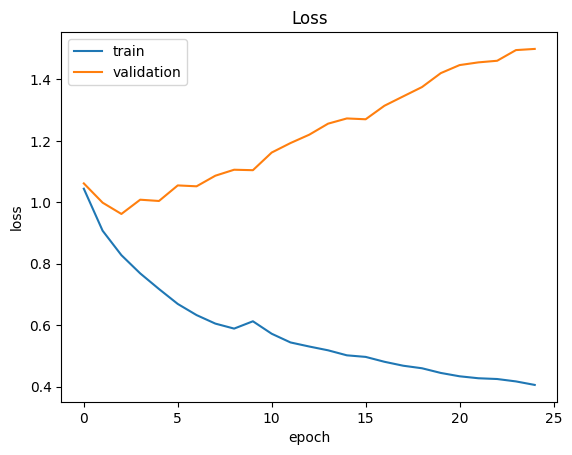

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

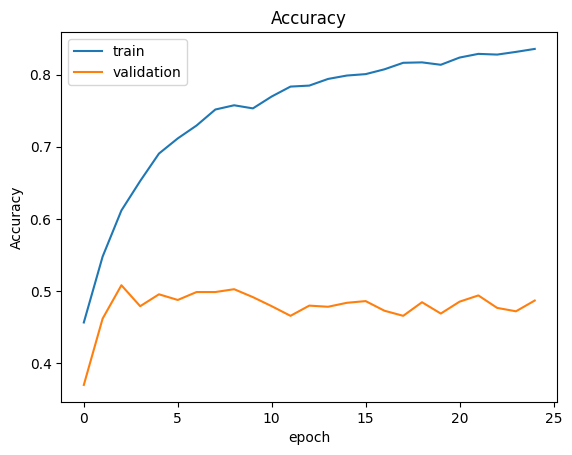

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction and Result

In [42]:
sentiment = ['Neutral','Negative','Positive']

In [43]:
train

,comment,Compound to sentiment
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দেখ...,positive
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯১৫ কিলোমিটারের...,positive
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive
3,2022 এর 25 জুন 🥰🥰,neutral
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive
...,...,...
6370,সব পিকাব বন্দ করে দেয়া হোক,negative
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,neutral
6372,এগুলা সব বিনপির এর কাজ,neutral
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক,negative


In [44]:
sequence = tokenizer.texts_to_sequences(['সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও '])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


'Neutral'

In [45]:
sequence = tokenizer.texts_to_sequences(['Agargaon to Uttara'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


'Neutral'

In [46]:
sequence = tokenizer.texts_to_sequences(['কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'Positive'

In [47]:
sequence = tokenizer.texts_to_sequences(['এটি একটি উদাহরণ টেক্সট যেখানে অনেক স্টপওয়ার্ড রয়েছে।'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Neutral'

# My Review

Although the model is predicting fine, but from the loss, we can easily see that the model is Overfitting since the train loss is small and validation loss is very high. To prevent overfitting, we need to add some regularization in the model.

# Building model again with some regularization

In [48]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history2 = model.fit(x = tweets, y= labels, epochs=30,validation_split=0.2)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.4147 - loss: 1.0779 - val_accuracy: 0.3616 - val_loss: 1.1163
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.4866 - loss: 1.0036 - val_accuracy: 0.3686 - val_loss: 1.1354
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.5354 - loss: 0.9429 - val_accuracy: 0.4494 - val_loss: 1.0283
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.5859 - loss: 0.8781 - val_accuracy: 0.4761 - val_loss: 0.9930
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.5910 - loss: 0.8631 - val_accuracy: 0.4808 - val_loss: 1.0185
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.6145 - loss: 0.8327 - val_accuracy: 0.4337 - val_loss: 1.1824
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.6311 - loss: 0.8042 - val_accuracy: 0.5137 - val_loss: 1.0096
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 143ms/step - accuracy: 0.6598 - loss: 0

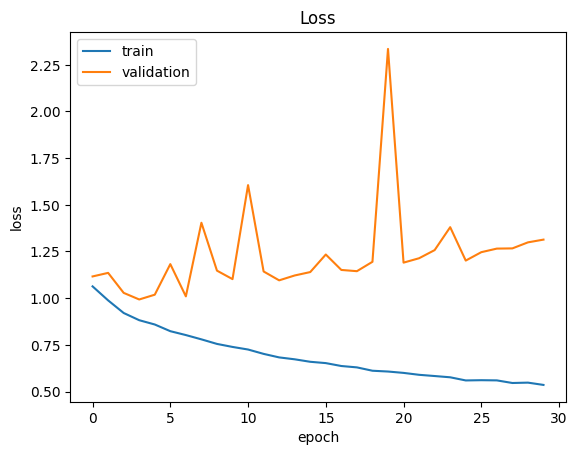

In [51]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

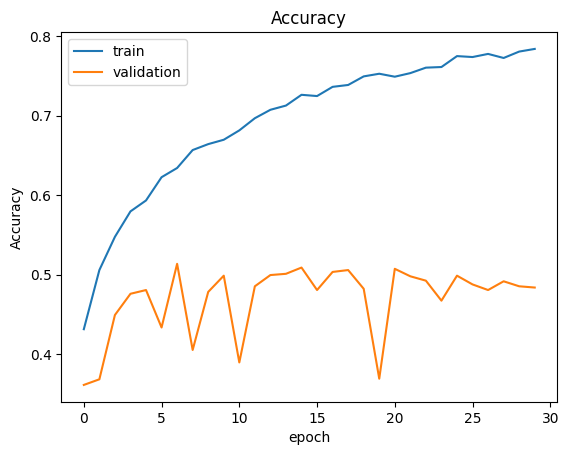

In [52]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction and Result

In [53]:
sequence = tokenizer.texts_to_sequences(['কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


'Positive'

In [54]:
sequence = tokenizer.texts_to_sequences(['তুমি ভালো আছো না'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'Neutral'

In [55]:
sequence = tokenizer.texts_to_sequences([' আমরা খেতে যাব না'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'Neutral'

# My Review

After adding some regularization and lowing the complexity of Neural network, the model is working fine as we can see from the loss and accuracy graph.